In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(f'../results_final_Dec22/granger_T.csv', index_col=0)
df.columns = [c.strip('_y') for c in df.columns]
df.index = [i.strip('_x') for i in df.index]


In [5]:
df.to_csv(f'../results_final_Dec22/granger_result_Tumor_traj.csv')

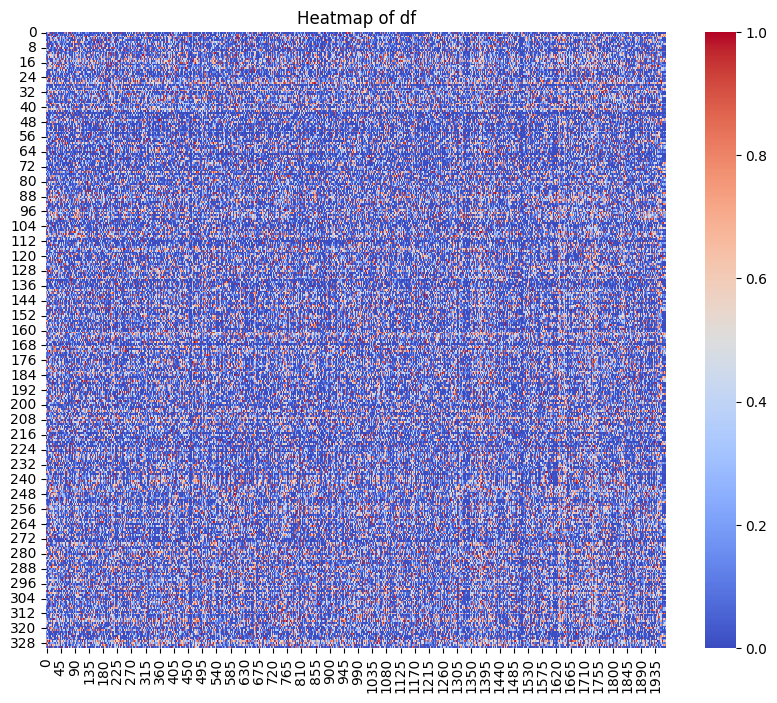

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# sns.heatmap(-np.log(df.values + 1e-10), cmap='coolwarm')
sns.heatmap(df.values, cmap='coolwarm')
plt.title('Heatmap of df')
plt.show()

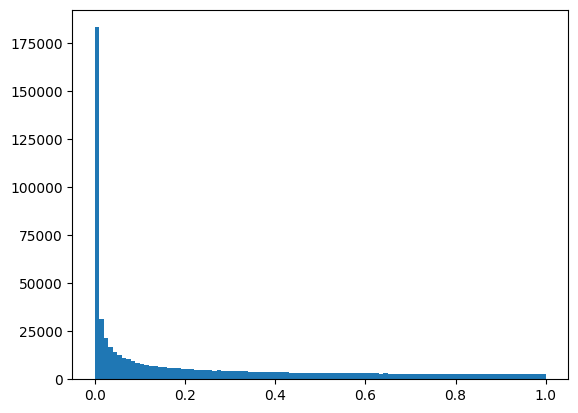

In [5]:
plt.hist(df.values.flatten(), 100);

In [6]:
intersect_genes = np.intersect1d(df.columns, df.index)
df.loc[intersect_genes, intersect_genes]

,AKAP8L,ARID5B,ATF4,CDC5L,CEBPB,CEBPD,CEBPG,CENPA,CENPS,CENPX,...,TSC22D1,XBP1,YBX1,ZBTB20,ZFHX4,ZNF146,ZNF302,ZNF580,ZNF703,ZSCAN18
AKAP8L,1.000000e+00,0.038899,9.200839e-07,0.505905,0.117017,6.606890e-02,0.007798,0.131326,0.302003,1.299628e-03,...,0.000005,2.950389e-08,0.024826,0.019543,0.003794,0.000250,0.170701,0.000012,1.397257e-20,0.937004
ARID5B,3.472050e-02,1.000000,3.909748e-01,0.966280,0.189815,8.007898e-01,0.598498,0.010850,0.112784,6.304979e-03,...,0.359693,7.528925e-02,0.108352,0.796228,0.372905,0.963227,0.705963,0.578489,7.029568e-02,0.190626
ATF4,8.475283e-04,0.372154,9.999999e-01,0.145266,0.390824,2.119243e-01,0.006431,0.124397,0.007562,2.760395e-03,...,0.229973,2.199612e-03,0.009967,0.006320,0.007634,0.564102,0.560998,0.873869,1.251581e-06,0.009784
CDC5L,6.745210e-01,0.764242,3.125424e-02,1.000000,0.372059,2.355880e-01,0.385355,0.114286,0.638520,8.419637e-01,...,0.231654,1.031151e-01,0.609877,0.234967,0.154875,0.037516,0.769430,0.647188,5.111471e-04,0.246203
CEBPB,1.605052e-02,0.040535,6.301739e-01,0.461734,1.000000,3.894401e-03,0.657497,0.104421,0.000032,5.198505e-08,...,0.001714,4.140401e-03,0.295942,0.882627,0.192620,0.802295,0.148912,0.821186,2.849448e-02,0.288506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF146,7.432686e-04,0.456042,1.789723e-01,0.031258,0.522307,9.047083e-01,0.006343,0.007556,0.444654,1.649493e-01,...,0.017282,8.211112e-03,0.023321,0.061417,0.249367,1.000000,0.551972,0.517562,3.513008e-07,0.001167
ZNF302,2.130146e-01,0.359604,4.770593e-01,0.725391,0.113437,6.410902e-07,0.310722,0.007149,0.102701,8.397955e-01,...,0.693979,1.188354e-01,0.149307,0.502047,0.914269,0.650001,1.000000,0.051071,8.538890e-01,0.106782
ZNF580,3.416234e-04,0.590553,8.662888e-01,0.671239,0.315940,7.310982e-03,0.467483,0.314756,0.000087,4.728358e-06,...,0.582768,5.622009e-04,0.009717,0.103929,0.036911,0.864240,0.177091,1.000000,7.623364e-03,0.160233
ZNF703,1.652572e-07,0.238599,2.792286e-04,0.034356,0.755549,7.302678e-02,0.012600,0.172298,0.001129,5.587277e-07,...,0.388112,5.658513e-08,0.000593,0.000424,0.000002,0.006713,0.917663,0.056589,9.999999e-01,0.076796


In [13]:
zero_indices = np.where(df == 0)
zero_locations = list(zip(zero_indices[0], zero_indices[1]))

# Convert row indices to index labels and column indices to column names
zero_locations_named = [(df.index[row], df.columns[col]) for row, col in zero_locations]

print(zero_locations_named)

[]


In [8]:
df.values.min()

4.7837392492758346e-60

In [9]:
df.loc[zero_locations_named[0][0], zero_locations_named[0][1]]

IndexError: list index out of range

In [9]:
import scanpy as sc
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [16]:
# mask = np.isin(adata.var_names, [zero_locations_named[0][0], zero_locations_named[0][1]])
mask = np.zeros(adata.n_vars, dtype=bool)
mask[0] = True
mask[1] = True

In [17]:
trajs = np.load(f"../results_final_Dec22/traj_gene_space_T.npy", allow_pickle=True)

In [18]:
traj_subset = trajs[..., mask]

In [20]:
data = np.transpose(traj_subset, (1, 0, 2))
# gene_names = np.array([zero_locations_named[0][0], zero_locations_named[0][1]])
gene_names = adata.var_names[mask]
traj_df = pd.DataFrame(data.mean(axis=0), columns=gene_names)

In [21]:
traj_df

,AL627309.1,AL669831.5
0,0.001267,0.025910
1,0.001307,0.024862
2,0.001345,0.023811
3,0.001377,0.022788
4,0.001405,0.021787
...,...,...
95,0.001588,0.031910
96,0.001563,0.032121
97,0.001525,0.032311
98,0.001479,0.032479


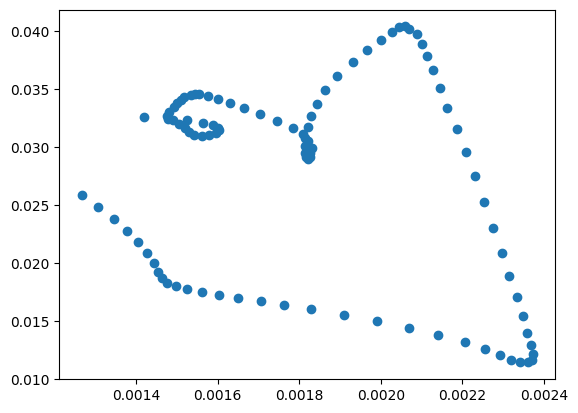

In [22]:
plt.scatter(traj_df[gene_names[0]], traj_df[gene_names[1]])

In [1]:
from tqdm import tqdm
import warnings
## KPSS Null hypothesis: there is a no unit root, meaning series is stationary
from statsmodels.tsa.stattools import kpss


def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f"KPSS Statistic: {statistic}")
    print(f"p-value: {p_value}")
    print(f"num lags: {n_lags}")
    print("Critial Values:")
    for key, value in critical_values.items():
        print(f"   {key} : {value}")
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


from statsmodels.tsa.stattools import grangercausalitytests

lag_order = 1
maxlag = (
    lag_order,  # becuase we got this value before. We are not suppose to add 1 to it
)
test = "ssr_chi2test"

from joblib import Parallel, delayed

def grangers_causation_matrix(
    data, in_variables, out_variables, test="ssr_chi2test", n_jobs=1, warn=False
):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """

    def get_pval(dd):
        if warn:
            test_result = grangercausalitytests(dd, maxlag=maxlag, verbose=True)
        else:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=FutureWarning)
                test_result = grangercausalitytests(dd, maxlag=maxlag, verbose=False)
                # according to the documentation https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html,
                # the dd has 2 columns, second causes the first.
        import pdb; pdb.set_trace()
        p_values = [test_result[i][0][test][1] for i in maxlag]
        min_p_value = np.min(p_values)
        return min_p_value


    out = Parallel(n_jobs=n_jobs)(
        # delayed(get_pval)(data[[r, c]]) # this is incorrect
        delayed(get_pval)(data[[c, r]]) # this means r causes c, so r is be in and c is out
        for c in tqdm(out_variables, desc="Processing columns")  # Outer loop progress bar
        for r in tqdm(in_variables, desc="Processing rows", leave=False)  # Inner loop progress bar
    )
    # Note that this is the wrong way and must be corrected
    # df = pd.DataFrame(
    #     np.array(out).reshape((len(in_variables), len(out_variables))), # this is incorrect
    #     columns=out_variables,
    #     index=in_variables,
    # )
    df = pd.DataFrame(
        np.array(out).reshape((len(out_variables), len(in_variables))), # should be reshaped to len(out_variables), len(in_variables) according to the for loop.
        columns=in_variables,
        index=out_variables,
    ).T # used the correct reshaping, and then transposed the matrix so the x and y are semantically correct (x causes y).
    df.index = [var + "_x" for var in in_variables]
    df.columns = [var + "_y" for var in out_variables]
    return df

def do_granger(trajs, in_genes, out_genes, n_jobs=1, warn=False):
    # in causes out
    trajs = trajs.T[::10]
    trajs = trajs - trajs.shift(1)
    trajs = trajs.dropna()
    out_traj = grangers_causation_matrix(
        trajs, in_variables=in_genes, out_variables=out_genes, n_jobs=n_jobs, warn=warn
    )
    return out_traj



In [2]:
gm = do_granger(traj_df.T, in_genes=gene_names[[0]], out_genes=gene_names[[1]], n_jobs=-1)

NameError: name 'traj_df' is not defined

In [25]:
gm

,AL669831.5_y
AL627309.1_x,0.451341


In [ ]:
df.loc[gene_names[0], gene_names[1]]

0.0

In [ ]:
gene_names

array(['GATA3', 'CCT2'], dtype='<U5')

In [ ]:
data.shape

(92, 100, 2)

In [ ]:
df2 = pd.read_csv('tmp_test.csv', index_col=0)

In [ ]:
df2.values.min()

1.2826915507341268e-32

In [ ]:
gm1 = do_granger(traj_df.T, in_genes=gene_names[[0]], out_genes=gene_names[[1]], n_jobs=-1)






Processing columns: 100%|██████████| 1/1 [00:00<00:00, 164.65it/s]


In [ ]:
gm1

,CCT2_y
GATA3_x,0.341761


In [ ]:
df

,NOC2L,HES4,ISG15,ERRFI1,ENO1,PGD,CENPS,SRM,PLOD1,EFHD2,...,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,CDH1,GAPDH
HES4,0.386854,0.322516,0.901839,8.954472e-01,9.093491e-01,1.249909e-01,0.560242,0.321999,2.834599e-01,0.721140,...,2.625013e-01,0.892320,0.677994,0.179006,0.108915,0.111496,9.193625e-01,0.785668,0.413815,0.981495
CENPS,0.803194,0.000043,0.660363,6.505420e-01,6.619464e-01,6.735831e-01,0.123069,0.791316,6.983293e-01,0.691989,...,5.813781e-01,0.843257,0.130754,0.286491,0.180651,0.456379,5.229327e-09,0.633771,0.431575,0.230403
RUNX3,0.761496,0.544198,0.724810,4.723843e-03,3.993536e-01,7.462470e-01,0.324311,0.225394,7.889747e-01,0.204553,...,3.512724e-01,0.013215,0.687592,0.000014,0.254784,0.311122,7.367898e-03,0.005163,0.205461,0.052024
AHDC1,0.312396,0.039732,0.728161,6.004415e-01,6.550867e-01,3.561632e-02,0.479752,0.699288,6.142107e-01,0.013805,...,4.408070e-01,0.955207,0.051010,0.293327,0.298495,0.866786,3.124357e-01,0.663333,0.648229,0.972848
ZBTB8A,0.332794,0.944415,0.508860,3.201719e-04,6.748406e-01,1.656413e-01,0.313251,0.612232,2.316367e-01,0.688988,...,2.786089e-01,0.016585,0.000579,0.617800,0.632733,0.027671,7.226554e-04,0.062942,0.213959,0.070474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BACH1,0.590471,0.575995,0.079238,9.019675e-01,1.382234e-01,2.380119e-01,0.007521,0.003856,6.208828e-02,0.306218,...,2.125095e-02,0.002939,0.390062,0.074336,0.000001,0.024424,9.958934e-02,0.038607,0.150066,0.001901
SON,0.104591,0.558444,0.000347,5.209682e-01,9.157096e-03,8.102504e-01,0.013666,0.009396,4.255982e-02,0.094846,...,3.604162e-01,0.931647,0.961220,0.356792,0.217884,0.793122,8.484640e-01,0.439690,0.069738,0.761672
RUNX1,0.674234,0.254938,0.989742,6.349783e-04,7.622215e-01,9.685655e-02,0.363076,0.002056,5.856471e-01,0.918613,...,3.877588e-10,0.249369,0.920968,0.002811,0.138738,0.990541,2.776979e-01,0.040885,0.058780,0.000002
ETS2,0.025208,0.072118,0.171282,3.344352e-11,9.351312e-06,1.146195e-08,0.006699,0.343548,1.394632e-08,0.257542,...,3.643987e-02,0.855921,0.014809,0.516830,0.341224,0.011243,2.232285e-01,0.287337,0.000443,0.706488


In [ ]:
traj_gene_sp = np.load(f"../results_final_Dec22/traj_gene_space_T.npy", allow_pickle=True)
# sc.pp.highly_variable_genes(adata, n_top_genes=400)
alex_genes = open('../data/alex_genes.txt').read().splitlines()
alex_tfs = open('../data/alex_tfs.txt').read().splitlines()
alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj_subset = traj_gene_sp[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]
# traj_df = pd.DataFrame(np.transpose(traj_subset, (1, 0, 2)).mean(axis=0), columns=gene_names)
data = np.transpose(traj_subset, (1, 0, 2))
valid_mask = (data.mean(axis=0).var(axis=0) != 0.0)
data = data[:, :, valid_mask]
gene_names = np.array(gene_names)[valid_mask]
traj_df = pd.DataFrame(data.mean(axis=0), columns=gene_names)

In [ ]:
gm1 = do_granger(traj_df.T, in_genes=df.index[:10], out_genes=df.columns[:10], n_jobs=-1)
gm2 = do_granger(traj_df.T, in_genes=df.index[:5], out_genes=df.columns[:5], n_jobs=-1)
gm3 = do_granger(traj_df.T, in_genes=df.index[:10], out_genes=df.columns[:15], n_jobs=-1)












































Processing columns: 100%|██████████| 10/10 [00:00<00:00, 29.13it/s]





















Processing columns: 100%|██████████| 5/5 [00:00<00:00, 50.45it/s]
































































Processing columns: 100%|██████████| 15/15 [00:00<00:00, 31.73it/s]


In [ ]:
gm1

,NOC2L_y,HES4_y,ISG15_y,ERRFI1_y,ENO1_y,PGD_y,CENPS_y,SRM_y,PLOD1_y,EFHD2_y
HES4_x,0.042306,1.000000,0.116742,3.083272e-01,0.037750,0.452045,2.866243e-08,0.418659,0.899307,0.395684
CENPS_x,0.026502,0.146633,0.857549,9.133007e-01,0.000961,0.759271,1.000000e+00,0.005341,0.541369,0.949224
RUNX3_x,0.698055,0.599462,0.339878,1.033588e-04,0.455522,0.377175,2.070784e-01,0.097731,0.454008,0.243152
AHDC1_x,0.598789,0.049435,0.256724,2.114117e-01,0.913732,0.221681,4.690639e-02,0.287425,0.916514,0.123789
ZBTB8A_x,0.938998,0.000041,0.623932,2.649687e-01,0.110319,0.196143,4.286693e-02,0.373719,0.374236,0.201891
RLF_x,0.140316,0.632341,0.435876,6.578897e-01,0.199921,0.246837,7.053279e-01,0.006401,0.156722,0.825791
ZFP69_x,0.575046,0.044491,0.806680,8.341304e-01,0.000298,0.661520,1.201931e-03,0.037432,0.641618,0.835952
HIVEP3_x,0.343454,0.078747,0.271302,3.476633e-02,0.884090,0.018767,5.692897e-02,0.424072,0.218330,0.009710
YBX1_x,0.169627,0.105368,0.098360,4.398768e-01,0.050936,0.170498,3.992090e-01,0.000362,0.011135,0.687989
JUN_x,0.880392,0.659954,0.084644,1.172409e-13,0.757666,0.056045,4.817478e-01,0.494637,0.034118,0.056479


In [ ]:
df.loc[df.index[:10], df.columns[:10]]

,NOC2L,HES4,ISG15,ERRFI1,ENO1,PGD,CENPS,SRM,PLOD1,EFHD2
HES4,0.386854,0.322516,0.901839,0.895447,0.909349,0.124991,0.560242,0.321999,0.283460,0.721140
CENPS,0.803194,0.000043,0.660363,0.650542,0.661946,0.673583,0.123069,0.791316,0.698329,0.691989
RUNX3,0.761496,0.544198,0.724810,0.004724,0.399354,0.746247,0.324311,0.225394,0.788975,0.204553
AHDC1,0.312396,0.039732,0.728161,0.600441,0.655087,0.035616,0.479752,0.699288,0.614211,0.013805
ZBTB8A,0.332794,0.944415,0.508860,0.000320,0.674841,0.165641,0.313251,0.612232,0.231637,0.688988
RLF,0.001757,0.669470,0.678395,0.598549,0.025580,0.313528,0.000120,0.007127,0.000003,0.023471
ZFP69,0.654615,0.037852,0.352345,0.125859,0.217690,0.213694,0.267965,0.123096,0.153962,0.003374
HIVEP3,0.016379,0.888899,0.440582,0.569993,0.009675,0.081771,0.388233,0.063944,0.925166,0.023314
YBX1,0.752377,0.085732,0.174891,0.202512,0.500328,0.885451,0.000022,0.658492,0.633695,0.019274
JUN,0.001028,0.238372,0.574191,0.069694,0.857793,0.096114,0.024562,0.679284,0.139009,0.537897


In [ ]:
gm2

,NOC2L_y,HES4_y,ISG15_y,ERRFI1_y,ENO1_y
HES4_x,0.042306,1.000000,0.116742,0.308327,0.037750
CENPS_x,0.026502,0.146633,0.857549,0.913301,0.000961
RUNX3_x,0.698055,0.599462,0.339878,0.000103,0.455522
AHDC1_x,0.598789,0.049435,0.256724,0.211412,0.913732
ZBTB8A_x,0.938998,0.000041,0.623932,0.264969,0.110319


In [ ]:
gm1.loc[gm1.index[:5], gm1.columns[:5]].values - gm2.values

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
gm3.loc[gm3.index[:10], gm3.columns[:10]].values - gm1.loc[gm1.index[:10], gm1.columns[:10]].values

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# THERE IS A BUG WHEN THE MATRIX IS NOT SQUARE!!!

In [ ]:
gm3

,NOC2L_y,HES4_y,ISG15_y,ERRFI1_y,ENO1_y,PGD_y,CENPS_y,SRM_y,PLOD1_y,EFHD2_y,FBLIM1_y,MFAP2_y,CAMK2N1_y,PINK1_y,DDOST_y
HES4_x,0.042306,1.000000,0.116742,3.083272e-01,0.037750,0.452045,2.866243e-08,0.418659,0.899307,0.395684,0.000801,0.009141,0.032035,0.604871,0.074424
CENPS_x,0.026502,0.146633,0.857549,9.133007e-01,0.000961,0.759271,1.000000e+00,0.005341,0.541369,0.949224,0.426593,0.180578,0.566098,0.669877,0.578755
RUNX3_x,0.698055,0.599462,0.339878,1.033588e-04,0.455522,0.377175,2.070784e-01,0.097731,0.454008,0.243152,0.045444,0.109515,0.703094,0.342721,0.250121
AHDC1_x,0.598789,0.049435,0.256724,2.114117e-01,0.913732,0.221681,4.690639e-02,0.287425,0.916514,0.123789,0.364900,0.288002,0.066544,0.484040,0.590042
ZBTB8A_x,0.938998,0.000041,0.623932,2.649687e-01,0.110319,0.196143,4.286693e-02,0.373719,0.374236,0.201891,0.292149,0.136671,0.027572,0.643264,0.967976
RLF_x,0.140316,0.632341,0.435876,6.578897e-01,0.199921,0.246837,7.053279e-01,0.006401,0.156722,0.825791,0.260768,0.240000,0.875486,0.498561,0.153204
ZFP69_x,0.575046,0.044491,0.806680,8.341304e-01,0.000298,0.661520,1.201931e-03,0.037432,0.641618,0.835952,0.076126,0.057377,0.256388,0.817632,0.907197
HIVEP3_x,0.343454,0.078747,0.271302,3.476633e-02,0.884090,0.018767,5.692897e-02,0.424072,0.218330,0.009710,0.402207,0.289847,0.012385,0.137795,0.560028
YBX1_x,0.169627,0.105368,0.098360,4.398768e-01,0.050936,0.170498,3.992090e-01,0.000362,0.011135,0.687989,0.819536,0.190224,0.736311,0.304524,0.812202
JUN_x,0.880392,0.659954,0.084644,1.172409e-13,0.757666,0.056045,4.817478e-01,0.494637,0.034118,0.056479,0.460459,0.688721,0.545923,0.527285,0.809413


In [ ]:
gm1

,NOC2L_y,HES4_y,ISG15_y,ERRFI1_y,ENO1_y,PGD_y,CENPS_y,SRM_y,PLOD1_y,EFHD2_y
HES4_x,0.042306,1.000000,0.116742,3.083272e-01,0.037750,0.452045,2.866243e-08,0.418659,0.899307,0.395684
CENPS_x,0.026502,0.146633,0.857549,9.133007e-01,0.000961,0.759271,1.000000e+00,0.005341,0.541369,0.949224
RUNX3_x,0.698055,0.599462,0.339878,1.033588e-04,0.455522,0.377175,2.070784e-01,0.097731,0.454008,0.243152
AHDC1_x,0.598789,0.049435,0.256724,2.114117e-01,0.913732,0.221681,4.690639e-02,0.287425,0.916514,0.123789
ZBTB8A_x,0.938998,0.000041,0.623932,2.649687e-01,0.110319,0.196143,4.286693e-02,0.373719,0.374236,0.201891
RLF_x,0.140316,0.632341,0.435876,6.578897e-01,0.199921,0.246837,7.053279e-01,0.006401,0.156722,0.825791
ZFP69_x,0.575046,0.044491,0.806680,8.341304e-01,0.000298,0.661520,1.201931e-03,0.037432,0.641618,0.835952
HIVEP3_x,0.343454,0.078747,0.271302,3.476633e-02,0.884090,0.018767,5.692897e-02,0.424072,0.218330,0.009710
YBX1_x,0.169627,0.105368,0.098360,4.398768e-01,0.050936,0.170498,3.992090e-01,0.000362,0.011135,0.687989
JUN_x,0.880392,0.659954,0.084644,1.172409e-13,0.757666,0.056045,4.817478e-01,0.494637,0.034118,0.056479


In [ ]:
gm3.values.shape

(10, 15)

In [ ]:
gm3p = pd.DataFrame(gm3.values.flatten().reshape(15, 10), index=gm3.columns, columns=gm3.index)

In [ ]:
gm3p

,HES4_x,CENPS_x,RUNX3_x,AHDC1_x,ZBTB8A_x,RLF_x,ZFP69_x,HIVEP3_x,YBX1_x,JUN_x
NOC2L_y,0.042306,1.000000,0.116742,0.308327,0.037750,0.452045,2.866243e-08,0.418659,8.993072e-01,0.395684
HES4_y,0.000801,0.009141,0.032035,0.604871,0.074424,0.026502,1.466334e-01,0.857549,9.133007e-01,0.000961
ISG15_y,0.759271,1.000000,0.005341,0.541369,0.949224,0.426593,1.805783e-01,0.566098,6.698766e-01,0.578755
ERRFI1_y,0.698055,0.599462,0.339878,0.000103,0.455522,0.377175,2.070784e-01,0.097731,4.540080e-01,0.243152
ENO1_y,0.045444,0.109515,0.703094,0.342721,0.250121,0.598789,4.943476e-02,0.256724,2.114117e-01,0.913732
PGD_y,0.221681,0.046906,0.287425,0.916514,0.123789,0.364900,2.880024e-01,0.066544,4.840400e-01,0.590042
CENPS_y,0.938998,0.000041,0.623932,0.264969,0.110319,0.196143,4.286693e-02,0.373719,3.742364e-01,0.201891
SRM_y,0.292149,0.136671,0.027572,0.643264,0.967976,0.140316,6.323412e-01,0.435876,6.578897e-01,0.199921
PLOD1_y,0.246837,0.705328,0.006401,0.156722,0.825791,0.260768,2.400004e-01,0.875486,4.985609e-01,0.153204
EFHD2_y,0.575046,0.044491,0.806680,0.834130,0.000298,0.661520,1.201931e-03,0.037432,6.416185e-01,0.835952


# The bug is in reshaping the output of the granger function!

In [ ]:
len_in = 4
len_out = 3
[(c,r) for c in range(len_out) for r in range(len_in)]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3)]

In [ ]:
np.array([str((c,r)) for c in range(3) for r in range(4)]).reshape(len_out, len_in)

array([['(0, 0)', '(0, 1)', '(0, 2)', '(0, 3)'],
       ['(1, 0)', '(1, 1)', '(1, 2)', '(1, 3)'],
       ['(2, 0)', '(2, 1)', '(2, 2)', '(2, 3)']], dtype='<U6')